# Finding Heavy Traffic Indicators on I-94

Darren Ho

## Introduction

In this project, we will be analyzing a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). John Hogue made the dataset available, and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on the I-94. Such variables can be weather type, time of the day, time of the week, etc. For example, we may find out that the traffic is usally heavier in the summer or when it snows. 

In [5]:
# Importing libraries that we will be using for our analysis
import pandas as pd
import matplotlib.pyplot as plt

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

traffic.head() # First 5 rows of traffic dataset

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
traffic.tail() # Last 5 rows of traffic dataset

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [7]:
traffic.info() # More info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The traffic dataset has 48,204 rows with 9 columns.  

## Analyzing Traffic Volume

The [dataset doc](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and saint Paul recorded the traffic data. The station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will only be able to infer about the westbound traffic in the proximity of that station. In other words, we should avoud generalizing our results for the entirety of the I-94. 

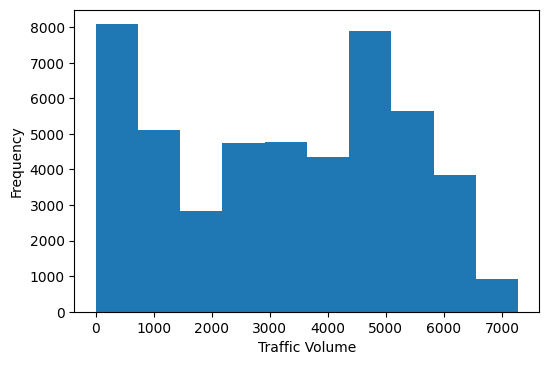

In [13]:
# Enables Jupyter to generate the graphs
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [11]:
# Few stats about the traffic_volume column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The distribution of the traffic_volume column ranges from 0 to 7,280 cars. The average westbound traffic volume is approximately 3,260 cars, with a standard deviation of approximately 1,987 cars.

We can also note that 25% of the time, there were 1,193 cars or fewer passing the station each hour, and another 25% of the time, there were 4,933 cars or more. Could this stark difference be the result of daytime and nighttime influence? The possibility gives our analysis an interesting direction: comparing daytime and nighttime data. 

## Traffic Volume: Day vs. Night

We will start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it is a good starting point. 

In [17]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])  # Transform column to datetime 
traffic['date_time'] 

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [29]:
# Using Series.dt.hour property to get the hour of every instance of the date_time column
# so that we can isolate the daytime / nighttime data

day_time = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
night_time = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

print('Num of Rows/Columns',day_time.shape)
day_time.head()

Num of Rows/Columns (23877, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [43]:
print('Num of Rows/Columns',night_time.shape)
night_time.head()

Num of Rows/Columns (24327, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


Now that we have divided the dataset into two parts: daytime and nighttime, we can compare the traffic volume at night and during the day

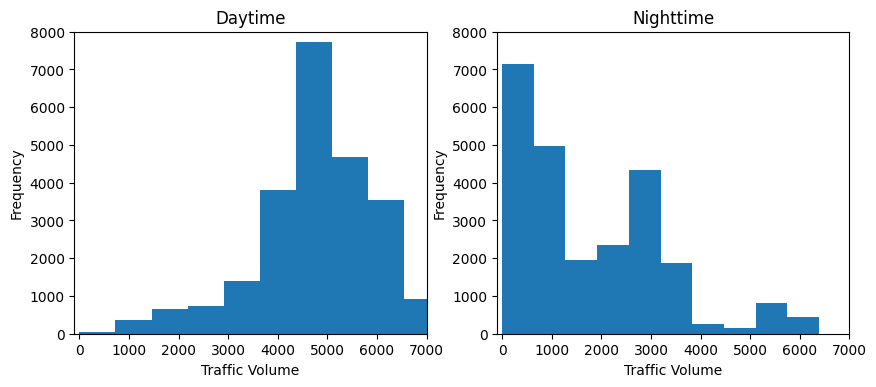

In [53]:
# Plotting histograms for both day and night side-by-side on a grid chart

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
day_time['traffic_volume'].plot.hist()
plt.title('Daytime')
plt.xlabel('Traffic Volume')
plt.xlim(-100,7000)
plt.ylim(0,8000)

plt.subplot(1, 2, 2)
night_time['traffic_volume'].plot.hist()
plt.title('Nighttime')
plt.xlabel('Traffic Volume')
plt.xlim(-100,7000)
plt.ylim(0,8000)
plt.show()

In [54]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [55]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The distribution of daytime traffic volume is left skewed, meaning the average traffic volume of 4,762 cars is less than the median of 4,820 cars. This means that the majority of the data is on the right side, meaning a majority of the traffic volume is high in the daytime. 

The distribution of nighttime traffic volume is right skewed, meaning the average traffic volume of 1,785 cars is more than the median of 1,287 cars. This means that the majority of the data is on the left side, meaning a majority of the traffic volume is low in the nighttime.

Because our goal is to find indicators of heavy traffic, we could probably move on from using nighttime data since we know traffic is light at night. So we can focus solely on the daytime data moving forward. 

## Time Indicators (Month)

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We'll look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of the day

In [62]:
# Average traffic volume for each month

day_time['month'] = day_time['date_time'].dt.month  # create new col where each value describes month when traffic volume was taken
by_month = day_time.groupby('month').mean()         # group dataset by the month col with the mean as aggregate func
by_month['traffic_volume']

<ipython-input-62-7a30ba94e0dd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

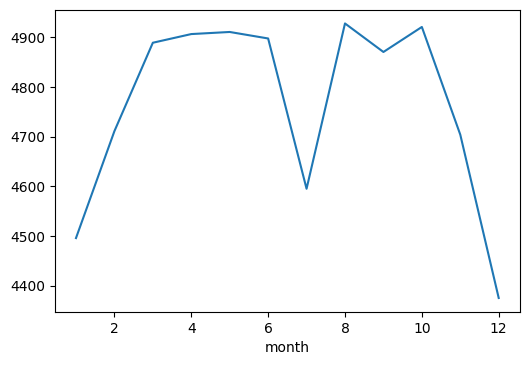

In [63]:
by_month['traffic_volume'].plot.line()
plt.show()

Analyzing the line plot, we see that traffic volume is relatively low during the Winter months of November, December, and January. Traffic is at its peak volume in the warmer months, however traffic takes a large dip in July  

## Time Indicators (Day of the Week)

We'll now continue with building line plots for another time unit: day of the week.

To get the traffic volume averages for each day of the week, we will need to use the following code:

In [65]:
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek
by_dayofweek = day_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-65-e42a3e605df7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

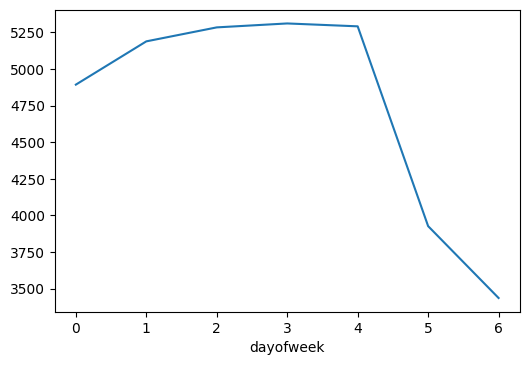

In [66]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic volume is at its peak during the business days, and its lowest during the weekend. Thursday is when traffic is at its heaviest, whereas Sunday is when traffic is at its lightest. 

## Time Indicators (Time of Day)

We will now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we are going to look at the averages separately. To do that, we will start by splitting the data based on the day type: business day or weekend.

In [67]:
day_time['hour'] = day_time['date_time'].dt.hour
bussiness_days = day_time.copy()[day_time['dayofweek'] <= 4] # 4 == Friday
weekend = day_time.copy()[day_time['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-67-634df4e6b376>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



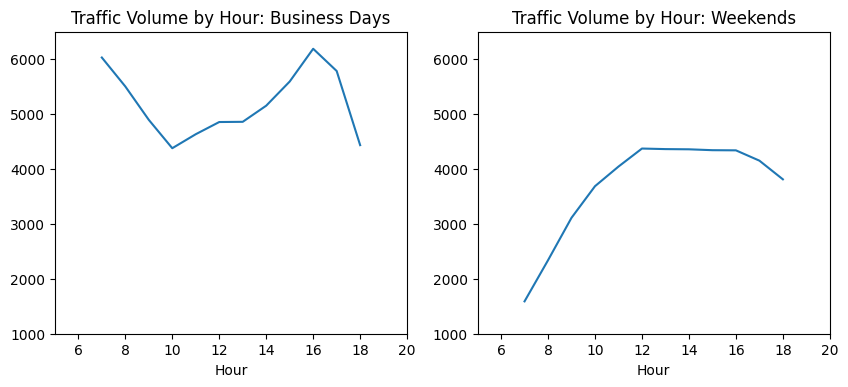

In [74]:
plt.figure(figsize=(10,4))

# Business Days
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour: Business Days')
plt.xlabel('Hour')
plt.xlim(5,20)
plt.ylim(1000,6500)

# Weekends
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour: Weekends')
plt.xlabel('Hour')
plt.xlim(5,20)
plt.ylim(1000,6500)

plt.show()

Analyzing both charts, we see that rush hour on business days begins at 7 a.m. before taking a dip at 10 a.m. and then slowly rises before rush hour hits again at 4-5 p.m. On weekends, we see a significant drop off in traffic, with 7 a.m. being the lighest traffic gets, and about 12 p.m. to 1 p.m. being the heaviest traffic. 

To summarize all our findings regarding time indicators for heavy traffic:

- Traffic is heaviest during the warm months, and lightest during Winter (Nov-Jan)
- Traffic is heaviest during the business days (Mon-Fri), and its lightest during the weekend. Thursday is when traffic is at its heaviest, whereas Sunday is when traffic is at its lightest.
- Rush hours on business days occur at 7 a.m. and 4-5 p.m.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`

In [75]:
# finding correlation
day_time.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The weather column with the strongest correlation with `traffic_volume` is the `temp` column, with a positive correlation value of approximately 0.13.

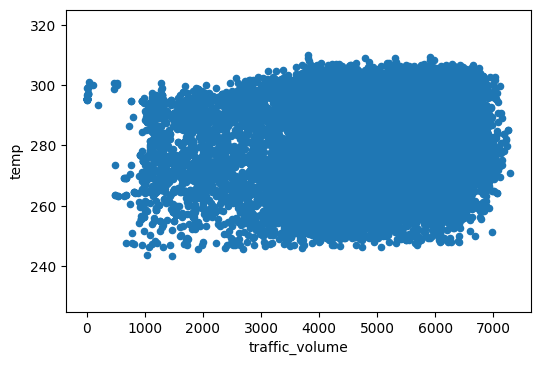

In [79]:
day_time.plot.scatter(x='traffic_volume', y='temp')
plt.ylim(225,325) 
plt.show()

Although `temp` has the strongest correlation with `traffic_volume`, the 0.13 indicates a pretty weak-positive correlation. This does not seem to be a reliable indicator for heavy traffic, in addition to the other numerical weather columns. Let's take a look at the remaining categorical columns.  

## Weather Types

To see if we can find more useful data, we will look next at the categorical weather-related columns: `weather_main` and `weather_description`.

We're going to calculate the average traffic volume associated with each unique value in these two columns.

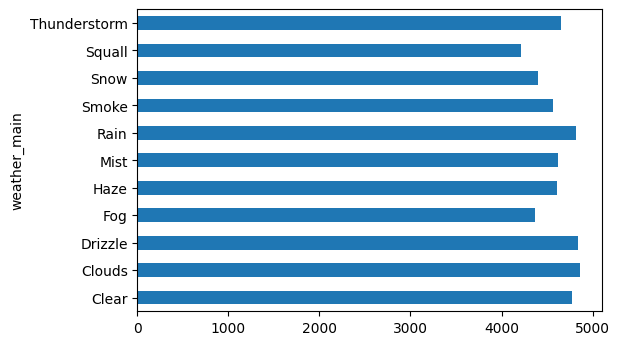

In [83]:
by_weather_main = day_time.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh() 
plt.show()

Analyzing the bar plot, we see that there isn't any traffic volume exceeding 5,000 cars. Weather type is relatively similar, so it's hard to find a type as a heavy traffic indicator. 

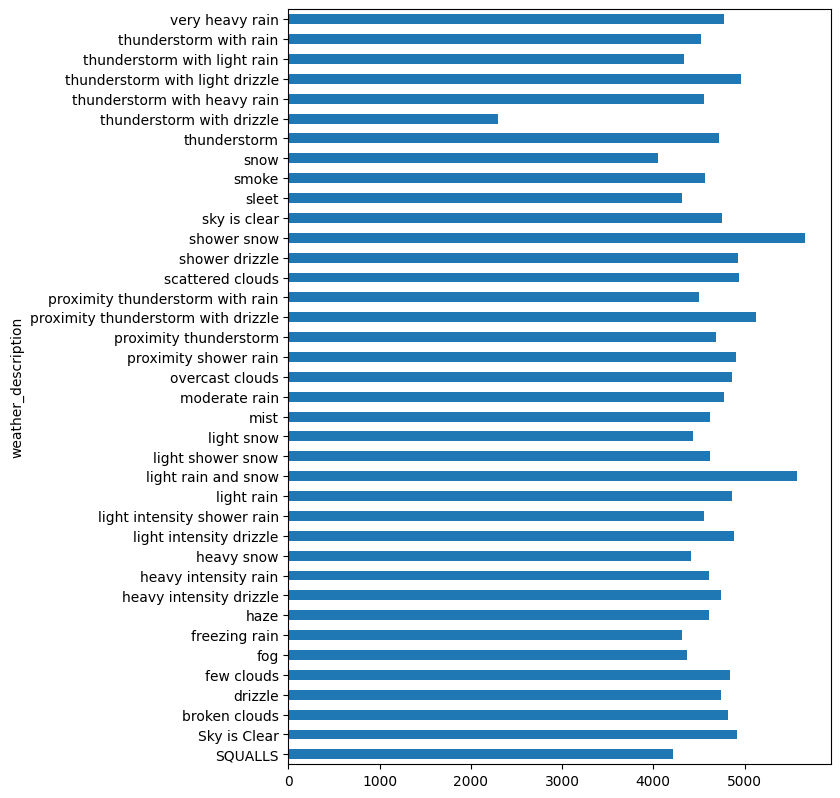

In [90]:
by_weather_description = day_time.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(7,10)) 
plt.show()

Analyzing this bar plot, we see that there are three weather types that exceed 5,000 cars: 

- Shower Snow
- Proximity Thunderstorm with Drizzle
- Light Rain and Snow

## Conclusion

The goal of our analysis was to determine a few indicators of heavy traffic on the I-94. Through our analysis, we found two types of indicators for heavy traffic: Time & Weather Type.   

To summarize all our findings regarding time indicators for heavy traffic:

- Traffic is heaviest during the warm months, and lightest during Winter (Nov-Jan)
- Traffic is heaviest during the business days (Mon-Fri), and its lightest during the weekend. Thursday is when traffic is at its heaviest, whereas Sunday is when traffic is at its lightest.
- Rush hours on business days occur at 7 a.m. and 4-5 p.m.

To summarize all our findings regarding weather type indicators for heavy traffic: 

- Shower Snow
- Proximity Thunderstorm with Drizzle
- Light Rain and Snow

## Next Steps

Some steps we could take to improve this analysis:

- Use the nighttime data to look for heavy traffic indicators
- Find more time and weather indicators